# Multi-step bootstrapping and TD Control Methods

# n-step Q(sigma), Tree Backup Algorithm, n-step SARSA, n-step expected SARSA, SARSA, Expected SARSA and Q-Learning

# IPython Notebook 1: Windy Grid World (Without Importance Sampling Ratio)

This IPython Notebook provides a natural transition from my last notebook dated 3rd February 2017. The algorithms that were compared last time were: Sarsa, Expected Sarsa and Q-learning.
Here, the above TD control methods are extended to multiple steps by the multi-step bootstrapping case. I have created additional variants of the various multi-step bootstrapping algorithms.

In summary, these are the list of various algorithms which have been implemented:

1. n-step Q(sigma) with importance sampling [off-policy] (as specified in the textbook by Sutton and Barto: Chapter 7). This algorithm provides a unified view of all the n-step bootstrapped TD control methods
2. n-step Q(sigma) without importance sampling [on-policy]
3. n-step Tree Backup Algorithm [off-policy learning without Importance Sampling]
4. n-step Expected Sarsa with importance sampling
5. n-step Expected Sarsa without importance sampling
6. n-step Sarsa with importance sampling
7. n-step Sarsa without importance sampling
8. Sarsa (one-step) without importance sampling (as specified in the textbook by Sutton and Barto: Chapter 6)
9. Expected  Sarsa (one-step) without importance sampling (as specified in the textbook by Sutton and Barto: Chapter 6)
10. Sarsa (one-step) with importance sampling
11. Expected  Sarsa (one-step) with importance sampling
12. Q-learning (off-policy TD Control)

$$\textbf{These algorithms have been implemented for two environments namely: Windy grid world and Cliffwalking}$$

$$\textbf{Parameters:}$$

$$\textbf{epsilon = 0.1}$$

$$\textbf{number of episodes = 1500}$$

$$\textbf{alpha varies from 0.1 to 1.0}$$

$$\textbf{three values for the discount factor (gamma) has been compared: 0.3, 0.8 and 1.0}$$

$$\textbf{n (number of steps) = 4}$$




# Results and Intuition developed based on the implementation and analysis which follows next:

Note:

I have implemented two versions for each and every algorithm viz. on-policy and off-policy.
Off-policy includes the case when the Importance Sampling Ratio (rho) has been accounted for and On-policy when there is NO Importance Sampling Ratio (rho). In chapter 6 of the book the authors mention Sarsa and Expected Sarsa without importance sampling whereas in Figure 7.5 of Chapter 7, the importance sampling ratio is introduced due to the behaviour policy.

Results for both the cases have been shown and analysed.

For Windy Grid World:
1. The Tree Backup algorithm performs better than all the other algorithms. This can be attributed to the fact that at every step instead of sampling a single action, the algorithm takes the expectation over all the available actions to do the backup updates. Also, the action which actually gets selected has its probability multiplied at every step down the tree. Note: The Tree Backup algorithm remains the same when compared with other algorithms for on-policy and the off-policy cases. But, the Tree Backup algorithm performs second best when the other methods are considered with importance sampling ratio.

2. The Q(sigma) performs the worst in both the on-policy and the off-policy case. One possibility of the failure is that here the sigma values are chosen to be alternative ones and zeros. Sutton and Barto mentions that sigma can be selected as a function of states, actions or sate-action pair. Trying this random selection might help improving the performance of Q(sigma).

3. One-step Expected Sarsa and One-step Sarsa perfroms better than their n-step (here, n=4) counterparts when the importance sampling ratio (rho) is not considered.

4. One-step Expected Sarsa outperforms all the algorithms when the ratio rho is considered. This is because of the variance analysis as seen in the paper:  A Theoretical and Empirical Analysis of Expected Sarsa by Harm van Seijen, Hado van Hasselt, Shimon Whiteson and Marco Wiering. The expected Sarsa algorithm has less variance ove rthe actions selected. The Tree Backup algorithms comes right after One-step Expected Sarsa.

For Cliff Walking:

One-step expected Sarsa (and One-step Sarsa is almost as good as One-step expected Sarsa) performs the best. The rest of the algorithms give similar performance and much worse than the One-step expected Sarsa (and One-step Sarsa).


$$\textbf{Takehome message: The Tree backup algorithm perofrms very good (almost best each time)}$$
$$\textbf{and Q(sigma) performs the worst. Newer environments must be tried to fully validate Q(sigma)'s performance.}$$
$$\textbf{Sarsa and expecte Sarsa perfroms good and sometime outperform the Tree Backup algorithm as seen above.}$$

The following diagrams (Sutton and Barto) should act as a good explanation for the different algorithms:

<img src="pic_1.png">
<img src="pic_2.png">
<img src="pic_3.png">
<img src="pic_4.png">


# Experimental Results


In [23]:
#import the libraries

%matplotlib inline

import gym
import itertools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import pylab
#import gym_maze

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib import plotting

from lib.envs.windy_gridworld import WindyGridworldEnv


matplotlib.style.use('ggplot')


In [24]:

env = WindyGridworldEnv()



In [25]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    We choose an epsilon greedy policy here.
    This is a cool helper function adapted from the WildML blog. 
    """
    
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

# n-step SARSA

In [26]:
"""
n-step SARSA
"""
def n_sarsa(env, num_episodes, alpha, discount_factor, epsilon,n):
   
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    
    for i_episode in range(num_episodes):
        
        states_list = []
        actions_list = []
        rewards_list = []
        
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        initial_state = state
        initial_action = action
        
        
        for t in itertools.count():
            
            next_state, reward, done, _ = env.step(action) #take an action At
                
            states_list.append(next_state) # St+1
            rewards_list.append(reward) # Rt+1
                
            next_action_probs = policy(next_state)  # Pick the next action
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
                
            actions_list.append(next_action) # At+1
        
            
            
            tau = t-n+1
            
            
            if tau == 0:
                
                G = 0
                G = sum(rewards_list[tau:tau+n]) + Q[states_list[tau+n-1]][actions_list[tau+n-1]]
                Q[initial_state][initial_action] = Q[initial_state][initial_action] + alpha * (G - Q[initial_state][initial_action])
            
            elif tau > 0:
                G = 0
                G = sum(rewards_list[tau:tau+n]) + Q[states_list[tau+n-1]][actions_list[tau+n-1]] # tau+n
                    
               
                Q[states_list[tau-1]][actions_list[tau-1]]  = Q[states_list[tau-1]][actions_list[tau-1]] + alpha * (G - Q[states_list[tau-1]][actions_list[tau-1]])
                
                
            
            action = next_action
            state = next_state
                        
            if done:
                break
            
            # Update statistics
        stats.episode_rewards[i_episode] = sum(rewards_list)
        stats.episode_lengths[i_episode] = t
        
          
    
    return Q, stats

In [27]:

#n step sarsa

n_episodes = 500

alpha = 1
eps = 0.1
gamma = 1
n = 4

alpha = np.zeros([10])
alpha[0] = 0.1

avg_reward_sarsa = np.zeros([10])
for i in range(10):
    
    Q_sarsa, stats_sarsa = n_sarsa(env, n_episodes,alpha[i],gamma,eps,n)
    avg_reward_sarsa[i] = np.sum(stats_sarsa.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for n-step SARSA","for n=",n
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1



Average reward is -37.98 for alpha= 0.1 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -34.096 for alpha= 0.2 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -39.858 for alpha= 0.3 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -44.316 for alpha= 0.4 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -45.964 for alpha= 0.5 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -58.686 for alpha= 0.6 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -93.186 for alpha= 0.7 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -73.252 for alpha= 0.8 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -147.368 for alpha= 0.9 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4
Average reward is -185.5 for alpha= 1.0 eps= 0.1 discount factor= 1 for n-step SARSA for n= 4


In [28]:
#one step sarsa

n_episodes = 500

alpha = 1
eps = 0.1
gamma = 1
n = 1

alpha = np.zeros([10])
alpha[0] = 0.1


#random_policy = create_random_policy(env.action_space.n)
#behaviour_policy = random_policy

avg_reward_sarsa_one = np.zeros([10])
for i in range(10):
    
    Q_sarsa_one, stats_sarsa_one = n_sarsa(env, n_episodes,alpha[i],gamma,eps,n)
    avg_reward_sarsa_one[i] = np.sum(stats_sarsa_one.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for n-step SARSA","for n=",n
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1



Average reward is -37.98 for alpha= 0.1 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -34.096 for alpha= 0.2 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -39.858 for alpha= 0.3 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -44.316 for alpha= 0.4 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -45.964 for alpha= 0.5 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -58.686 for alpha= 0.6 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -93.186 for alpha= 0.7 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -73.252 for alpha= 0.8 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -147.368 for alpha= 0.9 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1
Average reward is -185.5 for alpha= 1.0 eps= 0.1 discount factor= 1 for n-step SARSA for n= 1


# n-step expected sarsa

In [29]:
"""
n step expected SARSA
"""
def n_exp_sarsa(env, num_episodes, alpha, discount_factor, epsilon,n):
   
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    
    for i_episode in range(num_episodes):
        
        states_list = []
        actions_list = []
        rewards_list = []
        
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        initial_state = state
        initial_action = action
        
        
        for t in itertools.count():
            
            next_state, reward, done, _ = env.step(action) #take an action At
                
            states_list.append(next_state) # St+1
            rewards_list.append(reward) # Rt+1
                
            next_action_probs = policy(next_state)  # Pick the next action
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
                
            actions_list.append(next_action) # At+1
        
            
            
            tau = t-n+1
            
            if tau == 0:
                
                G = 0
                G = sum(rewards_list[tau:tau+n]) + np.sum(next_action_probs * Q[states_list[tau+n-1]])
                Q[initial_state][initial_action] = Q[initial_state][initial_action] + alpha * (G - Q[initial_state][initial_action])
            elif tau > 0:
                
                G = 0
                G = sum(rewards_list[tau:tau+n]) + np.sum(next_action_probs * Q[states_list[tau+n-1]])
                    
               
                Q[states_list[tau-1]][actions_list[tau-1]]  = Q[states_list[tau-1]][actions_list[tau-1]] + alpha * (G - Q[states_list[tau-1]][actions_list[tau-1]])
                
           
                
            
            
            action = next_action
            state = next_state
                        
            if done:
                break
            
            # Update statistics
        stats.episode_rewards[i_episode] = sum(rewards_list)
        stats.episode_lengths[i_episode] = t
        
          
    
    return Q, stats

In [30]:

#n expected step sarsa

n_episodes = 500

eps = 0.1
gamma = 1
n = 4

alpha = np.zeros([10])
alpha[0] = 0.1

avg_reward_exp_sarsa = np.zeros([10])
for i in range(10):
    
    Q_exp_sarsa, stats_exp_sarsa = n_exp_sarsa(env, n_episodes,alpha[i],gamma,eps,n)
    avg_reward_exp_sarsa[i] = np.sum(stats_exp_sarsa.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_exp_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for n-step expected SARSA","for n=",n
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1



Average reward is -34.056 for alpha= 0.1 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -34.564 for alpha= 0.2 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -33.69 for alpha= 0.3 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -41.696 for alpha= 0.4 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -36.128 for alpha= 0.5 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -63.186 for alpha= 0.6 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -65.13 for alpha= 0.7 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -84.828 for alpha= 0.8 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -77.3 for alpha= 0.9 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 4
Average reward is -123.358 for alpha= 1.0 eps= 0.1 discount factor= 

In [31]:
#one step expected step sarsa

n_episodes = 500

eps = 0.1
gamma = 1
n = 1

alpha = np.zeros([10])
alpha[0] = 0.1

avg_reward_exp_sarsa_one = np.zeros([10])
for i in range(10):
    
    Q_exp_sarsa_one, stats_exp_sarsa_one = n_exp_sarsa(env, n_episodes,alpha[i],gamma,eps,n)
    avg_reward_exp_sarsa_one[i] = np.sum(stats_exp_sarsa_one.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_exp_sarsa[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for n-step expected SARSA","for n=",n
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1



Average reward is -34.056 for alpha= 0.1 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -34.564 for alpha= 0.2 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -33.69 for alpha= 0.3 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -41.696 for alpha= 0.4 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -36.128 for alpha= 0.5 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -63.186 for alpha= 0.6 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -65.13 for alpha= 0.7 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -84.828 for alpha= 0.8 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -77.3 for alpha= 0.9 eps= 0.1 discount factor= 1 for n-step expected SARSA for n= 1
Average reward is -123.358 for alpha= 1.0 eps= 0.1 discount factor= 

# n-step tree backup

In [32]:
"""
n step tree backup
"""
def n_step_tree(env, num_episodes, alpha, discount_factor, epsilon,n):
   
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    
    for i_episode in range(num_episodes):
        
        states_list = []
        actions_list = []
        rewards_list = []
        delta_list = []
        pi_values = []
        
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        initial_state = state
        initial_action = action
        
        
        for t in itertools.count():
            
            next_state, reward, done, _ = env.step(action) #take an action At
                
            states_list.append(next_state) # St+1
            rewards_list.append(reward) # Rt+1
            
                
            next_action_probs = policy(next_state)  
            
            
            delta_list.append(reward + discount_factor * np.sum(next_action_probs * Q[next_state]) - Q[state][action]) #delta_t
            
            # Pick the next action At+1
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs) 
            
            actions_list.append(next_action) # At+1
        
            pi_values.append(next_action_probs[next_action])
            
            tau = t-n+1
            
            if tau == 0:
                
                E = 1
                G = Q[initial_state][initial_action]
                
                for k in range(n):
                    
                    G = G + E * delta_list[k]
                    E = discount_factor * E * pi_values[k]
                
                Q[initial_state][initial_action] = Q[initial_state][initial_action] + alpha * (G - Q[initial_state][initial_action])
            
            
            elif tau > 0:
                
                E = 1
                G = Q[states_list[tau-1]][actions_list[tau-1]]
                
                for k in range(n):
                    j = k + tau
                    G = G + E * delta_list[j]
                    E = discount_factor * E * pi_values[j]
                
                Q[states_list[tau-1]][actions_list[tau-1]] = Q[states_list[tau-1]][actions_list[tau-1]] + alpha * (G - Q[states_list[tau-1]][actions_list[tau-1]])
            
                
                
            '''
            if tau == 0:
                
                G = 0
                G = sum(rewards_list[tau:tau+n]) + np.sum(next_action_probs * Q[states_list[tau+n-1]])
                Q[initial_state][initial_action] = Q[initial_state][initial_action] + alpha * (G - Q[initial_state][initial_action])
           
            elif tau > 0:
                
                G = 0
                G = sum(rewards_list[tau:tau+n]) + np.sum(next_action_probs * Q[states_list[tau+n-1]])
                    
               
                Q[states_list[tau-1]][actions_list[tau-1]]  = Q[states_list[tau-1]][actions_list[tau-1]] + alpha * (G - Q[states_list[tau-1]][actions_list[tau-1]])
            
            '''
           
            action = next_action
            state = next_state
                        
            if done:
                break
            
            # Update statistics
        stats.episode_rewards[i_episode] = sum(rewards_list)
        stats.episode_lengths[i_episode] = t
        
        
          
    
    return Q, stats

In [33]:
#n-step tree backup

n_episodes = 500

eps = 0.1
gamma = 1
n = 4

alpha = np.zeros([10])
alpha[0] = 0.1

avg_reward_n_tree = np.zeros([10])
for i in range(10):
    
    Q_n_tree, stats_n_tree = n_step_tree(env, n_episodes,alpha[i],gamma,eps,n)
    avg_reward_n_tree[i] = np.sum(stats_n_tree.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_n_tree[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for n-step tree backup","for n=",n
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1



Average reward is -31.6 for alpha= 0.1 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -26.566 for alpha= 0.2 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -23.512 for alpha= 0.3 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -26.124 for alpha= 0.4 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -22.684 for alpha= 0.5 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -24.802 for alpha= 0.6 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -26.106 for alpha= 0.7 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -26.772 for alpha= 0.8 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -22.862 for alpha= 0.9 eps= 0.1 discount factor= 1 for n-step tree backup for n= 4
Average reward is -27.828 for alpha= 1.0 eps= 0.1 discount factor= 1 for n-step tree backup f

# n-step Q(sigma)

In [34]:
"""
n step Q(sigma)
"""

def n_step_q_sigma(env, num_episodes, alpha, discount_factor, epsilon,n):
   
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    
    for i_episode in range(num_episodes):
        
        states_list = []
        actions_list = []
        rewards_list = []
        delta_list = []
        pi_values = []
        sigma_values = []
        
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        initial_state = state
        initial_action = action
        
        
        for t in itertools.count():
            
            next_state, reward, done, _ = env.step(action) #take an action At
                
            states_list.append(next_state) # St+1
            rewards_list.append(reward) # Rt+1
            
                
            next_action_probs = policy(next_state)  
            
            
            
            # Pick the next action At+1
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs) 
            
            actions_list.append(next_action) # At+1
            
            # Store sigma values fo n=4
            
            if t==0:
                sigma_values.append(1)
            elif t==1:
                sigma_values.append(0)
            elif t%2 ==0 and t!=0:
                sigma_values.append(1)
            else:
                sigma_values.append(0)
                    
                    
            delta_list.append(reward + sigma_values[t]* Q[state][action] + discount_factor * (1 - sigma_values[t]) * np.sum(next_action_probs * Q[next_state]) - Q[state][action]) #delta_t

            
            pi_values.append(next_action_probs[next_action])
            
            tau = t-n+1
            
            if tau == 0:
                
                E = 1
                G = Q[initial_state][initial_action]
                
                for k in range(n):
                    
                    G = G + E * delta_list[k]
                    E = discount_factor * E * ((1-sigma_values[k])*pi_values[k] + sigma_values[k])
                
                Q[initial_state][initial_action] = Q[initial_state][initial_action] + alpha * (G - Q[initial_state][initial_action])
            
            
            elif tau > 0:
                
                E = 1
                G = Q[states_list[tau-1]][actions_list[tau-1]]
                
                for k in range(n):
                    j = k + tau
                    G = G + E * delta_list[j]
                    E = discount_factor * E * ((1-sigma_values[j])*pi_values[j] + sigma_values[j])
                
                Q[states_list[tau-1]][actions_list[tau-1]] = Q[states_list[tau-1]][actions_list[tau-1]] + alpha * (G - Q[states_list[tau-1]][actions_list[tau-1]])
            
                
            action = next_action
            state = next_state
                        
            if done:
                break
            
            # Update statistics
        stats.episode_rewards[i_episode] = sum(rewards_list)
        stats.episode_lengths[i_episode] = t
        
          
    
    return Q, stats

In [35]:
#n-step Q(sigma)

n_episodes = 500

eps = 0.1
gamma = 1
n = 4

alpha = np.zeros([10])
alpha[0] = 0.1

avg_reward_n_sigma = np.zeros([10])
for i in range(10):
    
    Q_q_sigma, stats_q_sigma = n_step_q_sigma(env, n_episodes,alpha[i],gamma,eps,n)
    avg_reward_n_sigma[i] = np.sum(stats_q_sigma.episode_rewards)/n_episodes
    print "Average reward is", avg_reward_n_sigma[i], "for alpha=", alpha[i], "eps=",eps,"discount factor=",gamma, "for n-step Q(sigma)","for n=",n
    if i<9:
        
        alpha[i+1] = alpha[i] + 0.1



Average reward is -45.648 for alpha= 0.1 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -39.54 for alpha= 0.2 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -38.324 for alpha= 0.3 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -388.966 for alpha= 0.4 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -202.646 for alpha= 0.5 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -188.52 for alpha= 0.6 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -233.244 for alpha= 0.7 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -230.154 for alpha= 0.8 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -152.922 for alpha= 0.9 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4
Average reward is -272.372 for alpha= 1.0 eps= 0.1 discount factor= 1 for n-step Q(sigma) for n= 4


# PLOTS

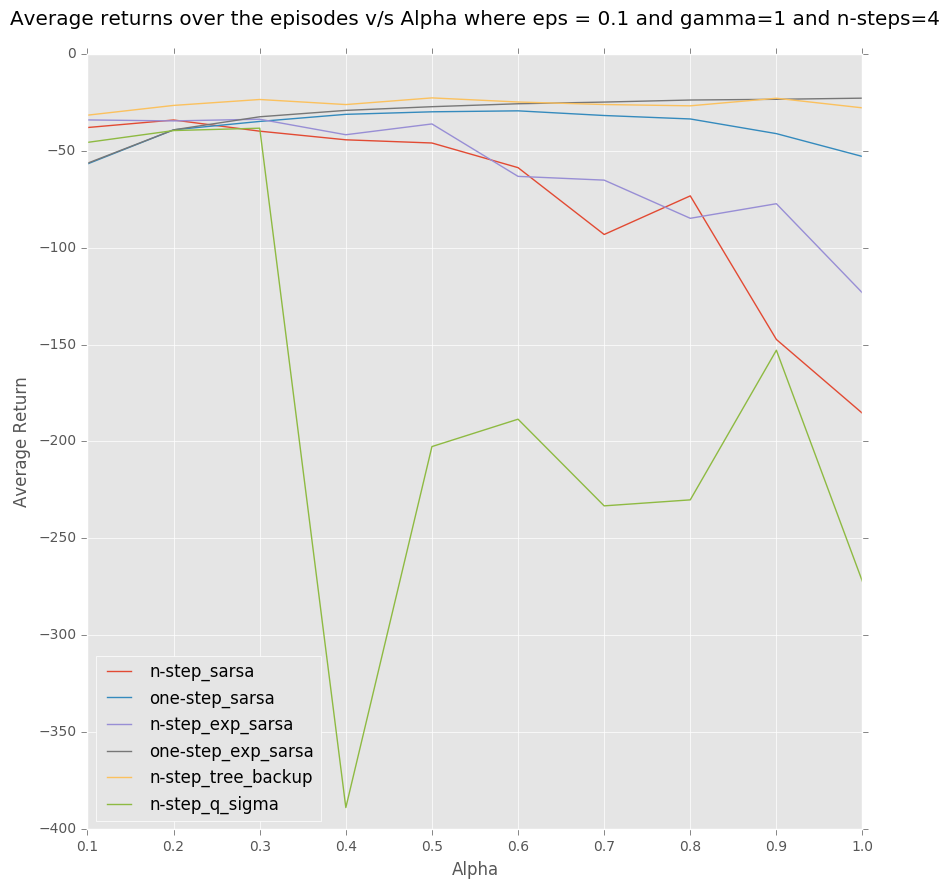

In [39]:
# Plot the above calculated statistics

plt.figure(figsize=(10,10))

#avg_reward_n_sigma[8:10] = avg_reward_n_sigma[7]

plt.title("Average returns over the episodes v/s Alpha where eps = 0.1 and gamma=1 and n-steps=4\n")
plt.xlabel('Alpha')
plt.ylabel('Average Return')


plt.plot(alpha, avg_reward_sarsa, label='n-step_sarsa')
plt.plot(alpha, avg_reward_sarsa_one, label='one-step_sarsa')
plt.plot(alpha, avg_reward_exp_sarsa, label='n-step_exp_sarsa')
plt.plot(alpha, avg_reward_exp_sarsa_one, label='one-step_exp_sarsa')
plt.plot(alpha, avg_reward_n_tree, label='n-step_tree_backup')
plt.plot(alpha, avg_reward_n_sigma, label='n-step_q_sigma')

plt.legend(loc="best")

plt.show()

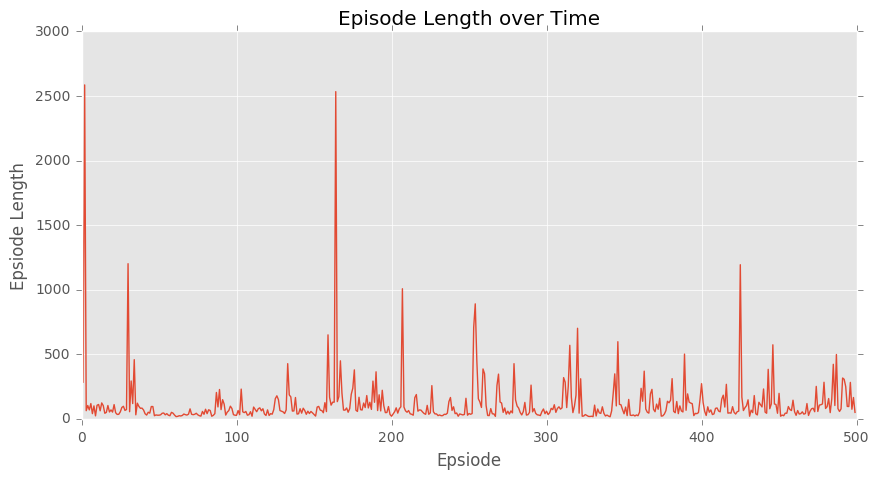

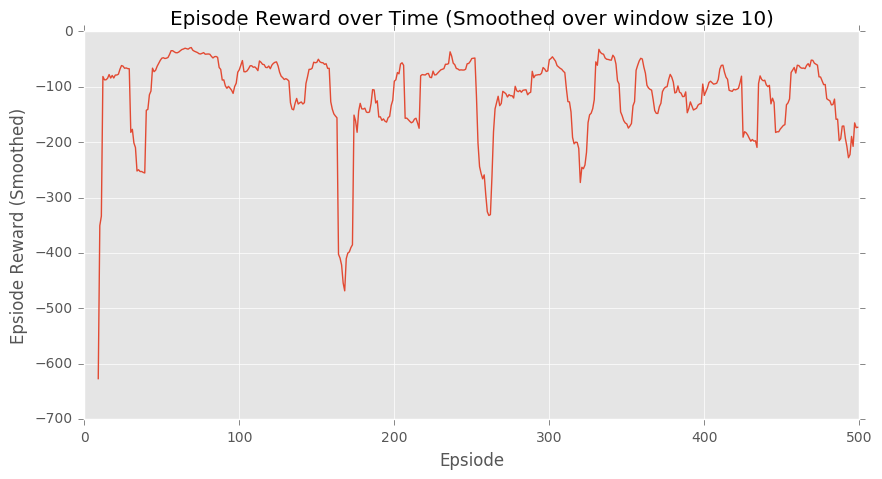

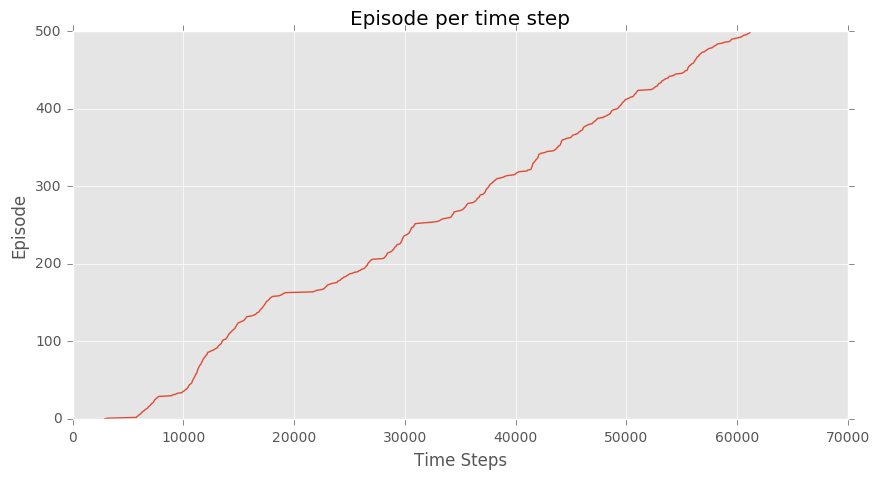

(<matplotlib.figure.Figure at 0x11359b090>,
 <matplotlib.figure.Figure at 0x114f6b390>)

In [41]:

"""
Sample Statistics done only for expected sarsa for the sake of clarity:

1. Episode length vs Number of episodes
2. Episode average reward vs Number of episodes
3. Number of episodes vs Time


"""

plotting.plot_episode_stats(stats_exp_sarsa)


# The End and future work:
As discussed with Pierre-Luc Bacon, I will make the changes to the Q(sigma) algorithm for Assignment 4.

References:

[1] Sutton, Richard S., and Andrew G. Barto. Reinforcement learning: An introduction. Vol. 1. No. 1. Cambridge: MIT press, 1998.
[2] http://www.wildml.com/